<a href="https://colab.research.google.com/github/skoghus/ProgrammingAssignment2/blob/master/2024-01-31_a320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import re
import pandas as pd
from datetime import datetime
import calendar
import folium


In [2]:

file = './2024-01-31-a320.txt'
prod_data  = []
expr = r"(^\d+) (\w+): ([\w+ ]*) (A\w+) (\w+-\w+|\w+|\w+-\w+ \(\w-\w+\)) (MSN\d+), .* ([A-Z]+)[-]?([\w-]{0,})-([A-Z]+) as ([A-Z0-9]+\d+)"

In [3]:
with open(file, 'r') as fh:
    for line in fh.readlines():
        data = re.search(expr, line) #'[,:]', line)
        if data:
            prod_data.append(data.groups())

len(prod_data)

31

In [4]:
cols = ['DAY', 'MONTH', 'OPERATOR', 'MODEL', 'TEST_REG', 'PROD_SERIAL', 'ORIGIN', 'PATH', 'DEST', 'REG' ]
df = pd.DataFrame(prod_data, columns=cols)

In [5]:
df.head()


,DAY,MONTH,OPERATOR,MODEL,TEST_REG,PROD_SERIAL,ORIGIN,PATH,DEST,REG
0,4,January,Flynas,A320neo,HZ-NS78,MSN11914,TLS,,RUH,XY4007
1,5,January,United Airlines,A321neo,N14503,MSN11599,XFW,KEF-CLE,TPA,UA3850
2,9,January,Shenzhen Airlines,A321neo,B32DS,MSN11227,TSN,,SZX,CSZ909
3,10,January,Transavia France,A320neo,F-GNEO,MSN11918,TLS,,ORY,TVF320
4,10,January,Volaris,A321neo,XA-VUH,MSN11763,XFW,KEF-YQX,MEX,Y49117


In [21]:
days = df.DAY
dates = [f'2024-01-{str(day)}' if len(day) == 2 else f'2024-01-0{str(day)}'for day in days]
df['DATE'] = dates
day_names = list(calendar.day_name)
get_day = lambda date : day_names[datetime.fromisoformat(date).weekday()]
#datetime.fromisoformat(df.DATE.iloc[0]).weekday()
df['WEEK_DAY'] = df.DATE.apply(get_day)
df.head()

,DAY,MONTH,OPERATOR,MODEL,TEST_REG,PROD_SERIAL,ORIGIN,PATH,DEST,REG,DATE,WEEK_DAY
0,4,January,Flynas,A320neo,HZ-NS78,MSN11914,TLS,,RUH,XY4007,2024-01-04,Thursday
1,5,January,United Airlines,A321neo,N14503,MSN11599,XFW,KEF-CLE,TPA,UA3850,2024-01-05,Friday
2,9,January,Shenzhen Airlines,A321neo,B32DS,MSN11227,TSN,,SZX,CSZ909,2024-01-09,Tuesday
3,10,January,Transavia France,A320neo,F-GNEO,MSN11918,TLS,,ORY,TVF320,2024-01-10,Wednesday
4,10,January,Volaris,A321neo,XA-VUH,MSN11763,XFW,KEF-YQX,MEX,Y49117,2024-01-10,Wednesday


<Axes: >

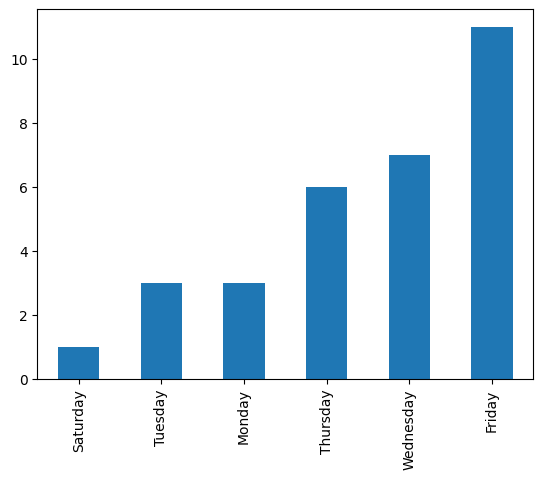

In [24]:
df.WEEK_DAY.value_counts().sort_values().plot.bar()

In [305]:
destaps = df.DEST.unique()
destaps
oriaps = df.ORIGIN.unique()
oriaps

array(['TLS', 'XFW', 'TSN', 'BFM'], dtype=object)

Axes(0.125,0.11;0.775x0.77)


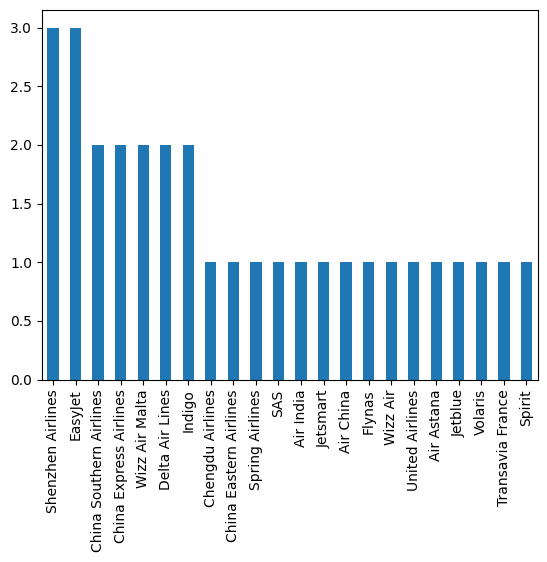

In [6]:
print(df.OPERATOR.value_counts().plot.bar())

Axes(0.125,0.11;0.775x0.77)


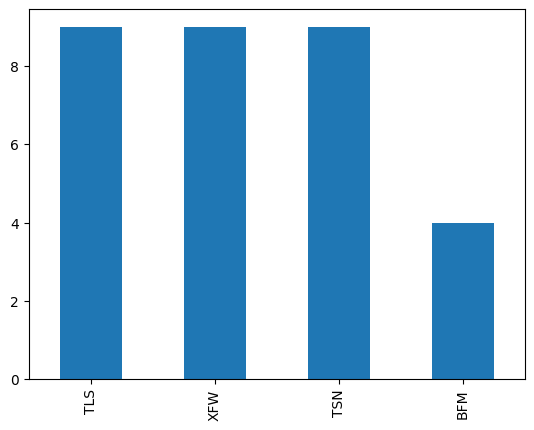

In [7]:
print(df.ORIGIN.value_counts().plot.bar())

<Axes: >

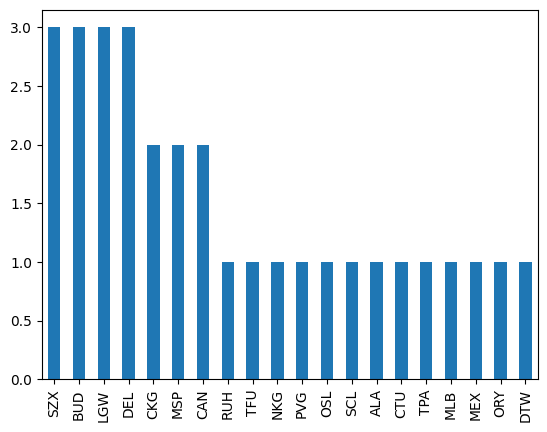

In [8]:
df.DEST.value_counts().plot.bar()

<Axes: >

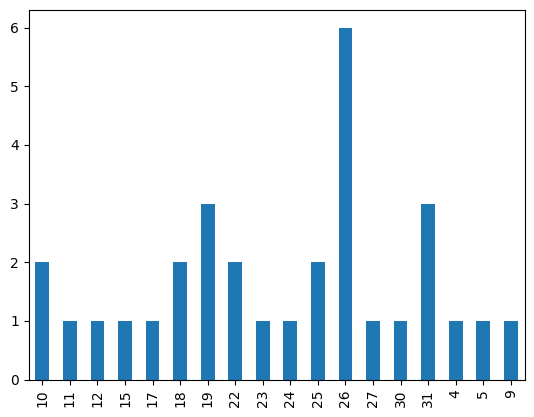

In [11]:
df.DAY.value_counts().sort_index().plot.bar()

In [28]:
airports = pd.read_html('airport_code_list.htm')
len(airports)

24

In [59]:
iata_airports = pd.concat(airports, ignore_index=True)
iata_airports.describe

<bound method NDFrame.describe of                              0               1    2
0                            A               A    A
1                       Aarhus         Denmark  AAR
2                       Abadan            Iran  ABD
3                       Abeche            Chad  AEH
4                     Aberdeen  United Kingdom  ABZ
...                        ...             ...  ...
2029                  Zaragoza           Spain  ZAZ
2030                      Zhob        Pakistan  PZH
2031                    Zinder           Niger  ZND
2032                  Zouerate      Mauritania  OUZ
2033  Zurich (Zürich) - Kloten     Switzerland  ZRH

[2034 rows x 3 columns]>

In [205]:
aircols = ['CITY', 'COUNTRY', 'IATA_CODE']
iata_airports.columns = aircols
#iata_airports.reindex()
iata_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CITY       2013 non-null   object
 1   COUNTRY    2012 non-null   object
 2   IATA_CODE  2013 non-null   object
dtypes: object(3)
memory usage: 47.8+ KB


## Handling missing values

In [210]:
iata_airports[iata_airports['COUNTRY'].isna()]
iata_airports.COUNTRY.iloc[734] = 'Isle of Man'

In [216]:
iata_airports.dropna(inplace=True)
iata_airports.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2033
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CITY       2013 non-null   object
 1   COUNTRY    2013 non-null   object
 2   IATA_CODE  2013 non-null   object
dtypes: object(3)
memory usage: 62.9+ KB


In [422]:
#obs = iata_airports[iata_airports.IATA_CODE.str.len() < 3]
iadf = iata_airports.drop(iata_airports[iata_airports.IATA_CODE.str.len() < 3].index)
iadf.reset_index(drop=True).head()
iadf.describe

<bound method NDFrame.describe of                           CITY         COUNTRY IATA_CODE
1                       Aarhus         Denmark       AAR
2                       Abadan            Iran       ABD
3                       Abeche            Chad       AEH
4                     Aberdeen  United Kingdom       ABZ
5                Aberdeen (SD)             USA       ABR
...                        ...             ...       ...
2029                  Zaragoza           Spain       ZAZ
2030                      Zhob        Pakistan       PZH
2031                    Zinder           Niger       ZND
2032                  Zouerate      Mauritania       OUZ
2033  Zurich (Zürich) - Kloten     Switzerland       ZRH

[1990 rows x 3 columns]>

In [309]:
us_state_abbr = pd.read_csv('/content/us_state_terr_twoletter_abbr.csv', delimiter='\t')
#us_state_abbr.head()

usst = us_state_abbr.set_index('ABBR').T.to_dict('records')[0]
usst['AL']

'Alabama'

In [332]:
import re
#city = iadf.CITY.iloc[4]#.split()[-1]
raw_cities = iadf.CITY
cities, states = [], []
#expr = r"([\w+ ]*) \((\w{2}) ?\)"
#expr = r"([\w+.]*) \((\w{2}) ?\)"
expr = r"([\w+/.\ ?]*\w+ ?) \((\w{2}) ?\)"
#state = []
for index, city in iadf.CITY.items(): #enumerate(raw_cities, start=1):
  #print(city)
  try:
    #citystate = re.search(r"\(([A-Z]{2})\)", city)
    citystate = re.search(expr, city)
    #print(citystate)
    if citystate is not None:
      #print(index, city)
      #print(citystate.groups[1], ' : ', citystate.groups[2])
     # print(citystate.groups()[0], citystate.groups()[1])
    #citystate = city.split('(')
    #if len(citystate[1].strip('( )')) == 2:
    #  print(citystate[0].strip(), ' : ', citystate[1].strip('( )'))
      #iadf['CITY1'].iloc[index] = citystate.groups()[0].strip()
      #iadf['STATE'].iloc[index] = citystate.groups()[1].strip()
      cities.append(citystate.groups()[0].strip())
    #  # print(citystate[1].strip('( )'))
      states.append(citystate.groups()[1].strip())
    else:
      states.append('na')
      cities.append(city)
  except Exception as e:
    print(e, city)

# test for number of records processed
print(len(cities), len(states))

iadf['CITY1'] = cities
iadf['STATE'] = states

iadf.head()


1990 1990


,CITY,COUNTRY,IATA_CODE,CITY1,STATE
1,Aarhus,Denmark,AAR,Aarhus,na
2,Abadan,Iran,ABD,Abadan,na
3,Abeche,Chad,AEH,Abeche,na
4,Aberdeen,United Kingdom,ABZ,Aberdeen,na
5,Aberdeen (SD),USA,ABR,Aberdeen,SD


In [333]:
iadf.STATE = iadf.STATE.map(usst)

iadf.head()

,CITY,COUNTRY,IATA_CODE,CITY1,STATE
1,Aarhus,Denmark,AAR,Aarhus,NaN
2,Abadan,Iran,ABD,Abadan,NaN
3,Abeche,Chad,AEH,Abeche,NaN
4,Aberdeen,United Kingdom,ABZ,Aberdeen,NaN
5,Aberdeen (SD),USA,ABR,Aberdeen,South Dakota


In [67]:
cc_data = pd.read_csv('worldcities.csv')
type(cc_data)

pandas.core.frame.DataFrame

In [68]:
cc_data.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629


In [275]:
cc_data.info()
cc_data.fillna('na')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        44691 non-null  object 
 1   city_ascii  44691 non-null  object 
 2   lat         44691 non-null  float64
 3   lng         44691 non-null  float64
 4   country     44691 non-null  object 
 5   iso2        44658 non-null  object 
 6   iso3        44691 non-null  object 
 7   admin_name  44375 non-null  object 
 8   capital     11138 non-null  object 
 9   population  44384 non-null  float64
 10  id          44691 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.8+ MB


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,na,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,na,na,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,na,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,na,na,1068007388


In [277]:
cc_data[(cc_data.city == 'Aberdeen')] # & (cc_data.country == 'United Kingdom')]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
3236,Aberdeen,Aberdeen,57.1500,-2.1100,United Kingdom,GB,GBR,Aberdeen City,NaN,200680.0,1826324306
20999,Aberdeen,Aberdeen,45.4649,-98.4686,United States,US,USA,South Dakota,NaN,28500.0,1840002032
26822,Aberdeen,Aberdeen,40.4165,-74.2249,United States,US,USA,New Jersey,NaN,19184.0,1840081652
29107,Aberdeen,Aberdeen,46.9757,-123.8094,United States,US,USA,Washington,NaN,16842.0,1840018446
29794,Aberdeen,Aberdeen,39.5151,-76.1733,United States,US,USA,Maryland,NaN,16176.0,1840005666


In [73]:
cc_data[(cc_data.city == 'Aberdeen') & (cc_data.country == 'United Kingdom')]['lat']

3236    57.15
Name: lat, dtype: float64

In [282]:
usairports = iadf[iadf.COUNTRY == 'USA']
usairports.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 5 to 2024
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CITY       462 non-null    object
 1   COUNTRY    462 non-null    object
 2   IATA_CODE  462 non-null    object
 3   CITY1      462 non-null    object
 4   STATE      440 non-null    object
dtypes: object(5)
memory usage: 21.7+ KB


In [296]:
usmerged_df = pd.merge(usairports, cc_data, how='inner', left_on=['CITY1','STATE'], right_on = ['city','admin_name'])
usmerged_df.info()
usmerged_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CITY        303 non-null    object 
 1   COUNTRY     303 non-null    object 
 2   IATA_CODE   303 non-null    object 
 3   CITY1       303 non-null    object 
 4   STATE       303 non-null    object 
 5   city        303 non-null    object 
 6   city_ascii  303 non-null    object 
 7   lat         303 non-null    float64
 8   lng         303 non-null    float64
 9   country     303 non-null    object 
 10  iso2        303 non-null    object 
 11  iso3        303 non-null    object 
 12  admin_name  303 non-null    object 
 13  capital     42 non-null     object 
 14  population  303 non-null    float64
 15  id          303 non-null    int64  
dtypes: float64(3), int64(1), object(12)
memory usage: 40.2+ KB


,CITY,COUNTRY,IATA_CODE,CITY1,STATE,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Aberdeen (SD),USA,ABR,Aberdeen,South Dakota,Aberdeen,Aberdeen,45.4649,-98.4686,United States,US,USA,South Dakota,NaN,28500.0,1840002032
1,Abilene (TX),USA,ABI,Abilene,Texas,Abilene,Abilene,32.4543,-99.7384,United States,US,USA,Texas,NaN,125474.0,1840019476
2,Akron (OH),USA,CAK,Akron,Ohio,Akron,Akron,41.0798,-81.5219,United States,US,USA,Ohio,NaN,546549.0,1840000791
3,Albany (GA),USA,ABY,Albany,Georgia,Albany,Albany,31.5776,-84.1762,United States,US,USA,Georgia,NaN,84901.0,1840013864
4,Albany (NY) - Albany International Airport,USA,ALB,Albany,New York,Albany,Albany,42.6664,-73.7987,United States,US,USA,New York,admin,604077.0,1840000417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Williston (ND),USA,ISL,Williston,North Dakota,Williston,Williston,48.1814,-103.6364,United States,US,USA,North Dakota,NaN,27368.0,1840001871
299,Wilmington (NC),USA,ILM,Wilmington,North Carolina,Wilmington,Wilmington,34.2099,-77.8866,United States,US,USA,North Carolina,NaN,247372.0,1840015576
300,Worcester (MA),USA,ORH,Worcester,Massachusetts,Worcester,Worcester,42.2705,-71.8079,United States,US,USA,Massachusetts,NaN,573573.0,1840000434
301,Yakima (WA),USA,YKM,Yakima,Washington,Yakima,Yakima,46.5923,-120.5496,United States,US,USA,Washington,NaN,130440.0,1840021154


In [308]:
cc_data[cc_data.country == 'United States'].sort_values(by='city').tail()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
26738,Zachary,Zachary,30.6643,-91.1634,United States,US,USA,Louisiana,NaN,19278.0,1840015908
22873,Zanesville,Zanesville,39.9565,-82.0132,United States,US,USA,Ohio,NaN,24809.0,1840001496
12770,Zephyrhills,Zephyrhills,28.2409,-82.1797,United States,US,USA,Florida,NaN,79795.0,1840015968
22957,Zion,Zion,42.4603,-87.8511,United States,US,USA,Illinois,NaN,24660.0,1840010114
20285,Zionsville,Zionsville,39.9897,-86.3182,United States,US,USA,Indiana,NaN,30258.0,1840010515


In [285]:
merged_df = pd.merge(iadf, cc_data, how='inner', left_on=['CITY1','COUNTRY'], right_on = ['city','country'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CITY        520 non-null    object 
 1   COUNTRY     520 non-null    object 
 2   IATA_CODE   520 non-null    object 
 3   CITY1       520 non-null    object 
 4   STATE       0 non-null      object 
 5   city        520 non-null    object 
 6   city_ascii  520 non-null    object 
 7   lat         520 non-null    float64
 8   lng         520 non-null    float64
 9   country     520 non-null    object 
 10  iso2        514 non-null    object 
 11  iso3        520 non-null    object 
 12  admin_name  517 non-null    object 
 13  capital     336 non-null    object 
 14  population  517 non-null    float64
 15  id          520 non-null    int64  
dtypes: float64(3), int64(1), object(12)
memory usage: 69.1+ KB


In [267]:
print(merged_df.STATE.iloc[0])
merged_df.STATE.iloc[0] = merged_df.admin_name.iloc[0]
print(merged_df.STATE.iloc[0])

('Midtjylland',)
Midtjylland


<ipython-input-267-2b0077230a05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.STATE.iloc[0] = merged_df.admin_name.iloc[0]


In [ ]:
#import math

#for index, state in merged_df.STATE.items():
#  print(state)
#  try:
#    if state.isna():
#      merged_df.STATE.iloc[index] = merged_df.admin_name.iloc[index]
#  except Exception as e:
#    print(e, state)
#
# merged_df.head()


In [299]:
frames = [merged_df, usmerged_df]
final_df =  pd.concat(frames, ignore_index=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CITY        823 non-null    object 
 1   COUNTRY     823 non-null    object 
 2   IATA_CODE   823 non-null    object 
 3   CITY1       823 non-null    object 
 4   STATE       303 non-null    object 
 5   city        823 non-null    object 
 6   city_ascii  823 non-null    object 
 7   lat         823 non-null    float64
 8   lng         823 non-null    float64
 9   country     823 non-null    object 
 10  iso2        817 non-null    object 
 11  iso3        823 non-null    object 
 12  admin_name  820 non-null    object 
 13  capital     378 non-null    object 
 14  population  820 non-null    float64
 15  id          823 non-null    int64  
dtypes: float64(3), int64(1), object(12)
memory usage: 103.0+ KB


In [306]:
oriaps

array(['TLS', 'XFW', 'TSN', 'BFM'], dtype=object)

In [324]:
#origin_coords = [(final_df.lat, final_df.lng) for ap in oriaps if final_df[final_df.IATA_CODE == ap]]

#origin_coords = final_df[final_df.IATA_CODE in oriaps]
#origin_coords
#final_df[

#[ap for ap in oriaps if final_df.IATA_CODE == ap]
final_df[final_df.IATA_CODE.isin(oriaps)]

,CITY,COUNTRY,IATA_CODE,CITY1,STATE,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
450,Tianjin,China,TSN,Tianjin,NaN,Tianjin,Tianjin,39.1467,117.2056,China,CN,CHN,Tianjin,admin,10368000.0,1156174046


In [326]:
for ap in oriaps:
  print(final_df[final_df.IATA_CODE == ap])

Empty DataFrame
Columns: [CITY, COUNTRY, IATA_CODE, CITY1, STATE, city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id]
Index: []
Empty DataFrame
Columns: [CITY, COUNTRY, IATA_CODE, CITY1, STATE, city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id]
Index: []
        CITY COUNTRY IATA_CODE    CITY1 STATE     city city_ascii      lat  \
450  Tianjin   China       TSN  Tianjin   NaN  Tianjin    Tianjin  39.1467   

          lng country iso2 iso3 admin_name capital  population          id  
450  117.2056   China   CN  CHN    Tianjin   admin  10368000.0  1156174046  
Empty DataFrame
Columns: [CITY, COUNTRY, IATA_CODE, CITY1, STATE, city, city_ascii, lat, lng, country, iso2, iso3, admin_name, capital, population, id]
Index: []


In [423]:
iadf.COUNTRY.sort_values()
iadf = iadf.drop(561)
iadf = iadf.drop(1081)
iadf = iadf.reset_index()
iadfcountries = pd.Series(iadf.COUNTRY.sort_values().unique()).rename('country')
cccountries = pd.Series(cc_data.country.sort_values().unique())
print(type(iadfcountries))
print(len(iadfcountries), len(cccountries))
#countries = [iadfcountries,  cccountries]
#ccs = pd.merge(iadfcountries.rename('iata'), cccountries.rename('cc'), how='outer', left_on=)
ccs
#iadfcountries.rename('iata')
iata = pd.DataFrame(iadfcountries)
#iata = iata.drop(0)
iata = iata.dropna()
#iata.reset_index()
ccs = iata.merge(cccountries.rename('country'), how='left', left_index=True, right_index=True) # on='country') #,
ccs #[ccs.cc == 'Estonia']
iata
#cccountries
ccs


<class 'pandas.core.series.Series'>
255 241


,country_x,country_y
0,Afghanistan,Afghanistan
1,Albania,Albania
2,Algeria,Algeria
3,American Samoa,American Samoa
4,Andorra,Andorra
...,...,...
250,Yemen,NaN
251,"Yunnan, PR China",NaN
252,Zambia,NaN
253,"Zhejiang, PR China",NaN


In [425]:
ccs.tail(30)

,country_x,country_y
225,Timor Leste (East Timor),Uganda
226,Togo,Ukraine
227,Tonga,United Arab Emirates
228,Trinidad and Tobago,United Kingdom
229,Tunisia,United States
230,Turkey,Uruguay
231,Turkmenistan,Uzbekistan
232,US Minor Outlying Islands,Vanuatu
233,USA,Vatican City
234,USA (LA),Venezuela


In [329]:

for city in cc_data.city:
  if re.search(city, iadf.CITY1)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1570,Toulouse,Toulouse,43.6045,1.444,France,FR,FRA,Occitanie,admin,493465.0,1250258110


In [334]:
iadf[iadf.COUNTRY == 'France']

,CITY,COUNTRY,IATA_CODE,CITY1,STATE
28,Ajaccio,France,AJA,Ajaccio,NaN
37,Albi,France,LBI,Albi,NaN
80,Annecy,France,NCY,Annecy,NaN
116,Aurillac,France,AUR,Aurillac,NaN
159,Bastia,France,BIA,Bastia,NaN
185,Bergerac - Roumanieres,France,EGC,Bergerac - Roumanieres,NaN
196,Biarritz,France,BIQ,Biarritz,NaN
226,Bordeaux - Bordeaux Airport,France,BOD,Bordeaux - Bordeaux Airport,NaN
242,Brest,France,BES,Brest,NaN
284,Calvi,France,CLY,Calvi,NaN
